<a href="https://colab.research.google.com/github/jc533/ML_practices/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# regression
output scalar
- linear regression


In [147]:
# without pytorch

In [148]:
# pytorch
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [149]:
# dataset
def f(x):
    return x*3+20;
class MyDataset(Dataset):
    def __init__(self,size=10):
        x = np.random.rand(size)*100
        self.x = torch.from_numpy(x)
        self.y = torch.from_numpy(f(x)+np.random.rand(size)*10-np.random.rand(size)*10)
        print(self.y)
        # self.data = torch.from_numpy(np.array([x,y]))
    def __getitem__(self,index):
        return torch.tensor([self.x[index]]),torch.tensor([self.y[index]])
    def __len__(self):
        return len(self.x)

```
pytorch dataset structure
hole: [
    batch:[data: [data]]
]
```

In [150]:
# model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.net = nn.Linear(1,1)
    def forward(self, x):
        return self.net(x)

In [151]:
# dataloader
train,test = MyDataset(),MyDataset()
train_loader = DataLoader(train, batch_size=1, shuffle=True)
test_loader = DataLoader(test, batch_size=1, shuffle=False)

tensor([ 62.2441,  41.3842, 248.0754, 198.6436, 139.8748,  65.5429, 251.4772,
        236.7172, 208.3033,  79.2786], dtype=torch.float64)
tensor([233.6047, 257.9623, 297.5735, 163.1367, 103.6738,  69.9134, 229.5915,
        246.4988,  65.5697, 170.4054], dtype=torch.float64)


In [161]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),0.1)
epochs = 20
loss_record = []
model.double()
for epoch in range(epochs):
    model.train()
    for x,y in train_loader:
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred,y)
        print(loss.item())
        loss_record.append(loss.item())
        loss.backward()
        optimizer.step()
print(np.mean(loss_record))

38176.18739146237
2234245323.400151
142233990790541.25
1.3512123396865606e+20
7.993549198065454e+24
1.3055219310246124e+28
1.3294563694799845e+32
4.533079980428191e+37
7.248717958482929e+41
9.46891669080172e+45
1.0821584996110068e+52
1.4474445339665575e+58
2.547341333660018e+62
1.1268448239066697e+65
1.1477083831900734e+69
3.680321859221091e+74
2.691375827077332e+80
1.5758651637319005e+85
6.263602753855156e+88
2.3007674062006606e+93
1.4967388227574482e+98
3.7809469050659575e+102
1.70037314685518e+106
2.3620592790168157e+110
1.2695706770275917e+115
6.168507308583779e+119
2.214437503298385e+124
5.1131628647455104e+128
4.371720912730581e+134
4.156857452624106e+140
4.7235754035717985e+144
1.8540577519892748e+148
4.767376224479067e+152
4.269217345246423e+157
4.8796502340012084e+163
2.46637144547149e+168
1.4021863258173113e+173
1.2002827494182894e+179
2.9302342995266647e+183
7.514832469778295e+187
8.539210688567662e+191
5.304470748607455e+194
8.662883377213679e+197
2.9392462868511697e+202
2.

In [157]:
model.eval()
preds = []
for x,y in test_loader:
    with torch.no_grad():
        p = model(x)
        preds.append(p.item())
        print(criterion(p,y))
print(np.mean(preds))

tensor(4.8292e+99, dtype=torch.float64)
tensor(6.0311e+99, dtype=torch.float64)
tensor(7.8777e+99, dtype=torch.float64)
tensor(2.0857e+99, dtype=torch.float64)
tensor(6.4751e+98, dtype=torch.float64)
tensor(2.8734e+98, dtype=torch.float64)
tensor(4.4123e+99, dtype=torch.float64)
tensor(5.1413e+99, dtype=torch.float64)
tensor(2.1172e+98, dtype=torch.float64)
tensor(2.1086e+99, dtype=torch.float64)
-5.225736962077926e+49


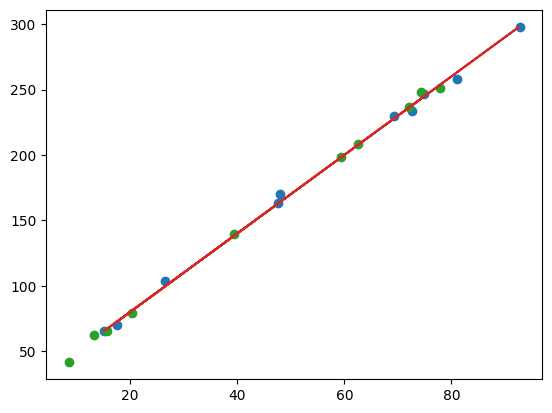

In [154]:
import matplotlib.pyplot as plt
x = [i.item() for i in test.x]
y = [i.item() for i in test.y]
y_tr = [i.item() for i in train.y]
x_tr = [i.item() for i in train.x]
real = [f(i) for i in x]
plt.plot(x,y,'o')
# plt.xlim(0,1)
# plt.ylim(0,30)
plt.plot(x,preds,'-')
plt.plot(x_tr,y_tr,'o')
plt .plot(x,real)